# Anomaly Detection in Network Traffic Using Local Outlier Factor (LOF) and Incremental PCA

## Overview
This code implements an anomaly detection approach using Local Outlier Factor (LOF) and Incremental Principal Component Analysis (PCA) on network traffic data. The goal is to identify and visualize outliers that could indicate suspicious activities or potential threats in the network.

## Key Components of the Code

### 1. **Data Loading**
The code begins by importing necessary libraries and loading various datasets from CSV files, which include test, validation, and training data. Each dataset is stored in a Pandas DataFrame for easy manipulation.

### 2. **Creating a Unique Identifier**
A new column, `streamID`, is added to the test dataset to provide unique identifiers for each record based on the index. This can be useful for tracking and referencing specific records during analysis.

### 3. **Anomaly Detection with LOF**
- The Local Outlier Factor algorithm is applied to the test dataset. LOF identifies outliers by measuring the local density of data points, allowing the algorithm to detect anomalies that deviate from the norm.
- The `fit_predict` method classifies each observation in the test dataset as either an outlier (-1) or an inlier (1). The results are then mapped to a binary format, where inliers are labeled as `0` and outliers as `1`.

### 4. **Visualizing Outlier Distribution**
The code generates pie charts to visualize the distribution of outliers based on source and destination IP addresses. This step helps in understanding the characteristics of the identified anomalies.

### 5. **Incremental PCA for Dimensionality Reduction**
- Incremental PCA is employed to reduce the dimensionality of the dataset while retaining the essential features that contribute to distinguishing between normal and anomalous behavior.
- The `fit` method is used to train the model on the training dataset, and the `transform` method reduces the dimensionality of the test dataset.

### 6. **Preparing Data for Visualization**
A new DataFrame is created to store the reduced features from PCA along with the LOF labels. This DataFrame is crucial for visualizing the relationships between different features and the identified outliers.

### 7. **Pairplot Visualization**
A pairplot is generated using Seaborn to visualize the relationship between the PCA features, colored by the LOF labels. This visualization allows for a clearer understanding of how the anomalies are distributed in the reduced feature space.

### 8. **Second LOF Application on PCA-Transformed Data**
A second LOF model is applied to the PCA-reduced test data. Similar steps as before are taken to predict and visualize the outliers.

### 9. **Variance Threshold Feature Selection**
- A VarianceThreshold is implemented to eliminate features with low variance, which are unlikely to contribute meaningful information for distinguishing between normal and anomalous data.
- The resulting DataFrame contains only the features that meet the defined variance threshold.

## Use Cases
- **Network Security**: Identifying potential threats in network traffic, such as intrusion detection and monitoring for suspicious activities.
- **Fraud Detection**: Detecting anomalous transactions in financial data to prevent fraud.
- **Quality Control**: Monitoring production processes in manufacturing to identify outliers that may indicate equipment malfunctions.

## Conclusion
This code demonstrates a systematic approach to anomaly detection using LOF and PCA, providing both insights into the data and visualization tools to help interpret the results. By identifying anomalies in network traffic, organizations can enhance their security measures and proactively address potential issues.


**Numpy** is a fundamental package for numerical computations in Python, especially useful for handling large arrays and matrices.

**Pandas** provides data structures like DataFrames that allow you to store, manipulate, and analyze tabular data.

**copy** library provides methods like copy.copy() and copy.deepcopy() to create copies of objects.

**LabelEncoder** is part of the scikit-learn (sklearn) library, which is popular for machine learning in Python.
LabelEncoder converts categorical labels into numeric values, which can be essential if your dataset includes non-numeric features (e.g., botnet traffic classes or IP labels) that need to be converted before applying models.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
from sklearn.preprocessing import LabelEncoder

In [3]:
testdata = pd.read_csv("/Users/sanatkumargupta/Desktop/ML_Anomaly_Detection/data/testFeatGen.csv", encoding="utf8",low_memory = False)
validationdata = pd.read_csv("/Users/sanatkumargupta/Desktop/ML_Anomaly_Detection/data/validationFeatGen.csv", encoding="utf8",low_memory = False)
traindata = pd.read_csv("/Users/sanatkumargupta/Desktop/ML_Anomaly_Detection/data/trainFeatGen.csv", encoding="utf8",low_memory = False)

In [4]:
testdata['streamID'] = testdata.index + 1

In [6]:
test_df_lof = pd.read_csv("/Users/sanatkumargupta/Desktop/ML_Anomaly_Detection/data/test_df_lof.csv", encoding="utf8",low_memory = False)
valid_df_lof = pd.read_csv("/Users/sanatkumargupta/Desktop/ML_Anomaly_Detection/data/valid_df_lof.csv", encoding="utf8",low_memory = False)
train_t_df_lof = pd.read_csv("/Users/sanatkumargupta/Desktop/ML_Anomaly_Detection/data/train_t_df_lof.csv", encoding="utf8",low_memory = False)
train_v_df_lof = pd.read_csv("/Users/sanatkumargupta/Desktop/ML_Anomaly_Detection/data/train_v_df_lof.csv", encoding="utf8",low_memory = False)

**LOF**


Local Outlier Factor
The LOF algorithm is designed to identify outliers in a dataset based on the local density of data points. It assesses the local density around a point and compares it to the density of its neighbors. If a point has a significantly lower density than its neighbors, it is considered an outlier.

In [7]:
from sklearn.neighbors import LocalOutlierFactor

Contamination 0.01

Test
The code uses the LocalOutlierFactor from scikit-learn to fit the model on test_df_lof, identifying outliers with 35 neighbors and a contamination rate of 1%. It measures execution time with %%time.

In [9]:
%%time
lof_t_1 = LocalOutlierFactor(n_neighbors = 35, contamination = 0.01)
labels_t_1 = lof_t_1.fit_predict(test_df_lof)

CPU times: user 12 ms, sys: 7.45 ms, total: 19.5 ms
Wall time: 43.5 ms


In [10]:
testresult_t_1 = copy.deepcopy(testdata)

testresult_t_1 = copy.deepcopy(testdata): This creates a deep copy of the testdata DataFrame. A deep copy ensures that changes made to testresult_t_1 do not affect the original testdata.

testresult_t_1["lof"] = pd.Series(labels_t_1): This line adds a new column named "lof" to the testresult_t_1 DataFrame, where the values come from labels_t_1. The labels_t_1 array contains the outlier labels generated by the LocalOutlierFactor model (1 for inliers and -1 for outliers).

testresult_t_1["lof"] = testresult_t_1["lof"].map({1: 0, -1: 1}): This line maps the original labels to a new binary format. Here, inliers (1) are mapped to 0, and outliers (-1) are mapped to 1. This transformation allows for easier interpretation, with 0 indicating a normal data point and 1 indicating an anomaly.

print(testresult_t_1["lof"].value_counts()): Finally, this line counts the occurrences of each unique value in the "lof" column and prints the results. It provides insights into how many normal and anomalous data points were identified in the test dataset.

In [11]:
testresult_t_1["lof"] = pd.Series(labels_t_1)
testresult_t_1["lof"] = testresult_t_1["lof"].map({1: 0, -1: 1})
print(testresult_t_1["lof"].value_counts())

lof
0    297
1      3
Name: count, dtype: int64


In [23]:
testresult_t_1plot = testresult_t_1[testresult_t_1.lof==1]

In [24]:
print(testresult_t_1plot.columns)


Index(['timestamp', 'duration', 'protocol', 'source_ip', 'source_port',
       'direction', 'destination_ip', 'destination_port', 'state',
       'source_type_of_service', 'destination_type_of_service',
       'total_packets', 'bytes_transferred_total',
       'bytes_transferred_source_to_dest', 'streamID', 'lof'],
      dtype='object')


<Axes: ylabel='count'>

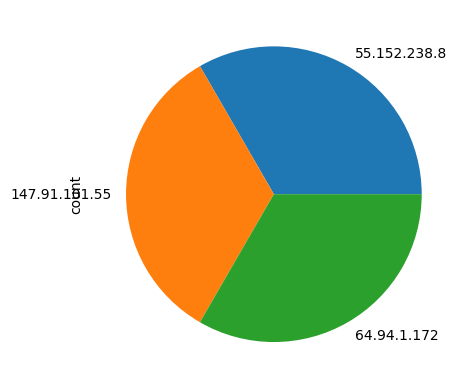

In [25]:
testresult_t_1plot.source_ip.value_counts()[:15].plot.pie()

<Axes: ylabel='count'>

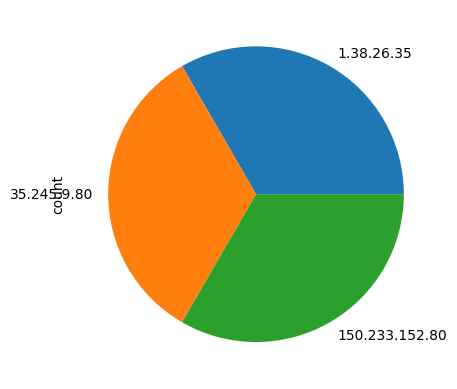

In [27]:
testresult_t_1plot.destination_ip.value_counts()[:15].plot.pie()

In [28]:
from sklearn.decomposition import IncrementalPCA
ipca_img = IncrementalPCA(n_components = 2, whiten = True, batch_size = 10)
ipca_img.fit(train_t_df_lof)

IncrementalPCA(batch_size=10, n_components=2, whiten=True)

In [29]:
reduced_test_data_lof = ipca_img.transform(test_df_lof)

In [30]:
lof_plot_df = testresult_t_1[['lof']]

In [32]:
lof_plot_df.loc[:, 'x'] = reduced_test_data_lof[:, 0]
lof_plot_df.loc[:, 'y'] = reduced_test_data_lof[:, 1]

In [34]:
import seaborn as sns

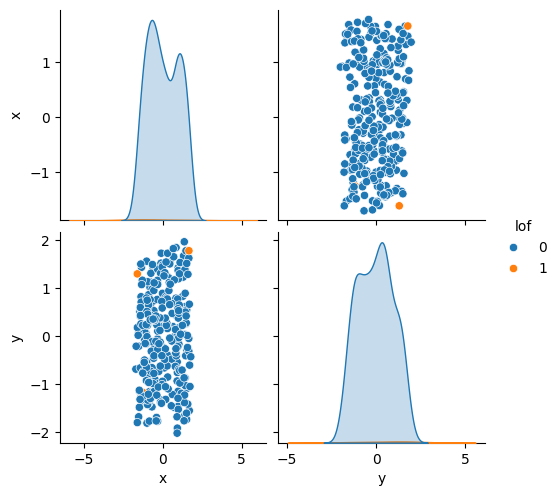

In [35]:
plot_lof_001_allfeat = sns.pairplot(lof_plot_df, hue = 'lof')

In [36]:
plot_lof_001_allfeat

In [37]:
plot_lof_001_allfeat.savefig('plot_lof_001_allfeat.png')

In [38]:
testresult_t_1plot.to_csv('test_result_lof_001_allfeat.csv',index=False)

**IPCA**

In [39]:
from sklearn.decomposition import IncrementalPCA
ipca = IncrementalPCA(n_components = 5, whiten = True, batch_size = 10)
ipca.fit(train_t_df_lof)

IncrementalPCA(batch_size=10, n_components=5, whiten=True)

In [40]:
#train_t_df_lof_ipca = ipca.transform(train_t_df_lof)
test_df_lof_ipca = ipca.transform(test_df_lof)

**Test**

In [41]:
%%time
lof_t_2 = LocalOutlierFactor(n_neighbors = 35, contamination = 0.01)
labels_t_2 = lof_t_2.fit_predict(test_df_lof_ipca)

CPU times: user 9.91 ms, sys: 3.65 ms, total: 13.6 ms
Wall time: 17.3 ms


In [42]:
testresult_t_2 = copy.deepcopy(testdata)

In [43]:
testresult_t_2["lof"] = pd.Series(labels_t_2)
testresult_t_2["lof"] = testresult_t_2["lof"].map({1: 0, -1: 1})
print(testresult_t_2["lof"].value_counts())

lof
0    297
1      3
Name: count, dtype: int64


In [44]:
testresult_t_2plot = testresult_t_2[testresult_t_2.lof==1]

<Axes: ylabel='count'>

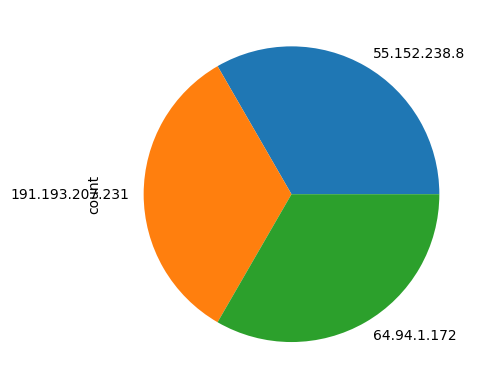

In [46]:
testresult_t_2plot.source_ip.value_counts()[:15].plot.pie()

<Axes: ylabel='count'>

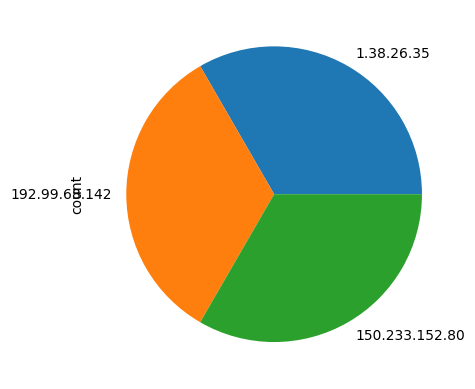

In [47]:
testresult_t_2plot.destination_ip.value_counts()[:15].plot.pie()

In [48]:
lof_plot_df_ipca = testresult_t_2[['lof']]

In [53]:
lof_plot_df_ipca.loc[:, 'pc1'] = test_df_lof_ipca[:, 0]
lof_plot_df_ipca.loc[:, 'pc2'] = test_df_lof_ipca[:, 1]
lof_plot_df_ipca.loc[:, 'pc3'] = test_df_lof_ipca[:, 2]
lof_plot_df_ipca.loc[:, 'pc4'] = test_df_lof_ipca[:, 3]
lof_plot_df_ipca.loc[:, 'pc5'] = test_df_lof_ipca[:, 4]

In [54]:
import seaborn as sns

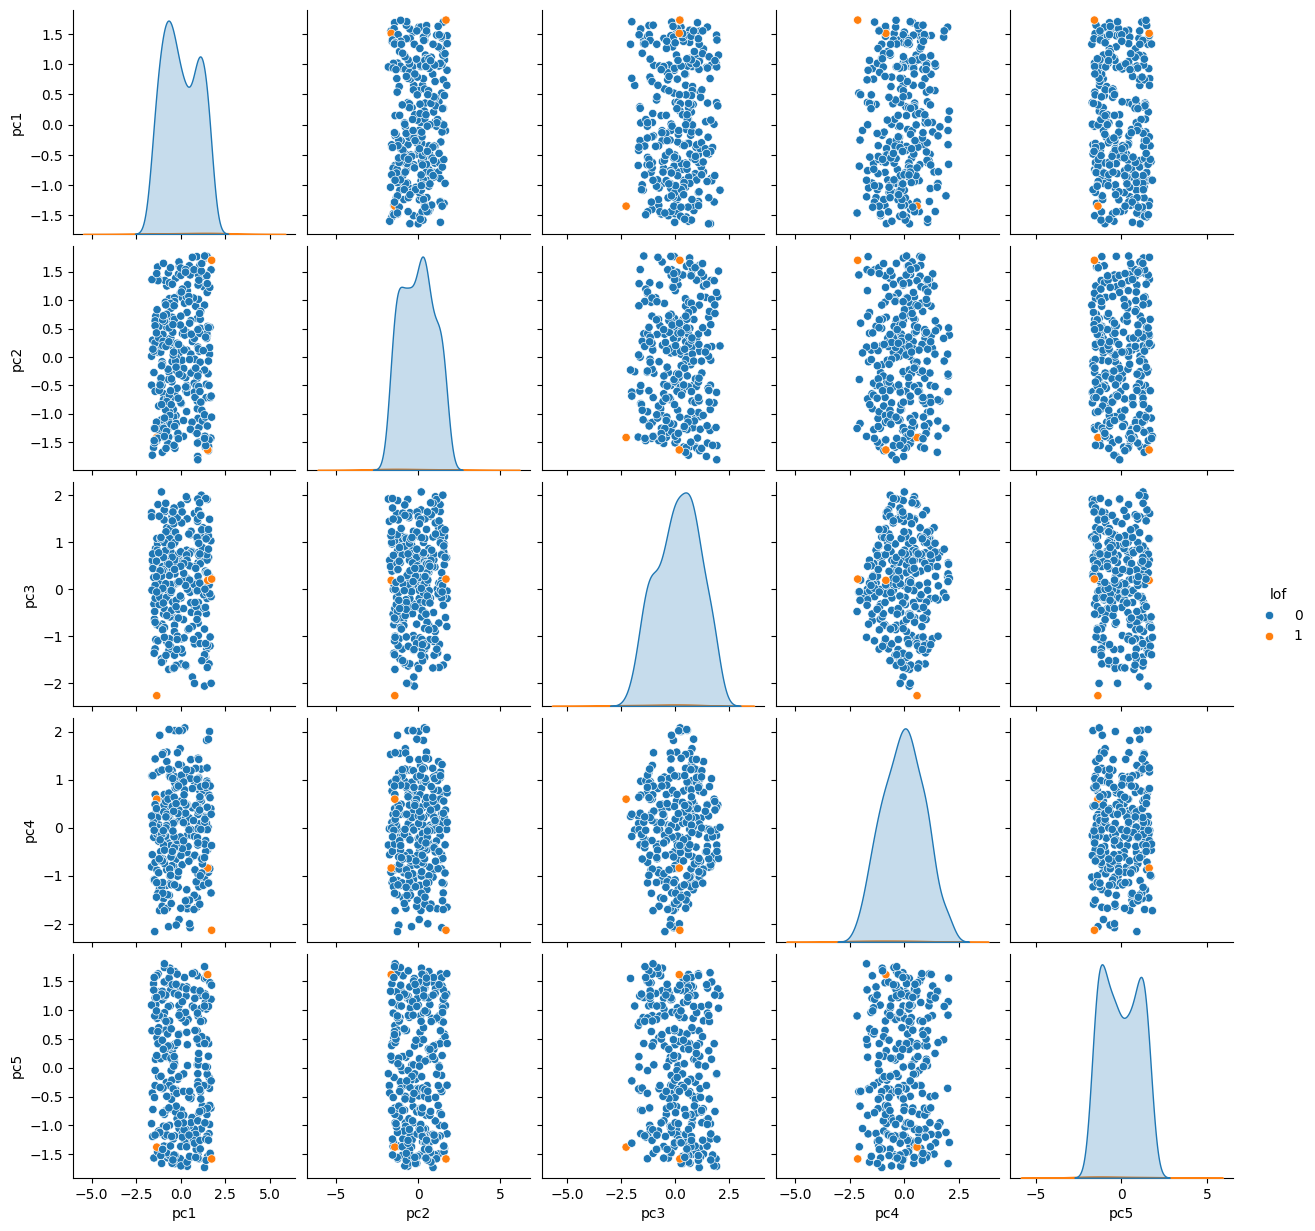

In [55]:
plot_lof_001_ipca = sns.pairplot(lof_plot_df_ipca, hue = 'lof')

In [56]:
plot_lof_001_ipca

In [57]:
plot_lof_001_ipca.savefig('plot_lof_001_ipca.png')

In [58]:
testresult_t_2plot.to_csv('test_result_lof_001_ipca.csv',index=False)

**Variance threshold**

In [59]:
from sklearn.feature_selection import VarianceThreshold

In [60]:
threshold = VarianceThreshold(threshold = .95)
train_t_df_lof_var = threshold.fit_transform(train_t_df_lof)

In [61]:
threshold.variances_

array([7.63396004e+03, 8.63999051e+04, 8.57052832e+08, 5.37213692e+08,
       3.51432676e+08, 3.59531038e+08])

In [62]:
train_t_df_lof_var = train_t_df_lof.loc[:, threshold.get_support()]

In [66]:
train_t_df_lof.columns = train_t_df_lof.columns.str.strip()
train_v_df_lof.columns = train_v_df_lof.columns.str.strip()
test_df_lof.columns = test_df_lof.columns.str.strip()
valid_df_lof.columns = valid_df_lof.columns.str.strip()

In [68]:
train_t_df_lof_var = train_t_df_lof.drop(labels=['source_type_service', 'destination_type_service'], axis=1, errors='ignore')
train_v_df_lof_var = train_v_df_lof.drop(labels=['source_type_service', 'destination_type_service'], axis=1, errors='ignore')
test_df_lof_var = test_df_lof.drop(labels=['source_type_service', 'destination_type_service'], axis=1, errors='ignore')
valid_df_lof_var = valid_df_lof.drop(labels=['source_type_service', 'destination_type_service'], axis=1, errors='ignore')

**Test**

In [69]:
%%time
lof_t_3 = LocalOutlierFactor(n_neighbors = 35, contamination = 0.01)
labels_t_3 = lof_t_3.fit_predict(test_df_lof_var)

CPU times: user 12.6 ms, sys: 7.07 ms, total: 19.7 ms
Wall time: 32.5 ms


In [70]:
testresult_t_3 = copy.deepcopy(testdata)

In [71]:
testresult_t_3["lof"] = pd.Series(labels_t_3)
testresult_t_3["lof"] = testresult_t_3["lof"].map({1: 0, -1: 1})
print(testresult_t_3["lof"].value_counts())

lof
0    297
1      3
Name: count, dtype: int64


In [72]:
testresult_t_3plot = testresult_t_3[testresult_t_3.lof==1]

<Axes: ylabel='count'>

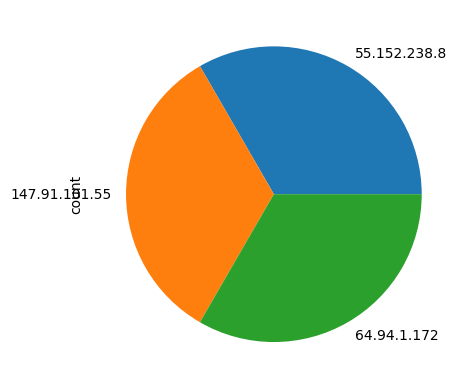

In [74]:
testresult_t_3plot.source_ip.value_counts()[:15].plot.pie()

<Axes: ylabel='count'>

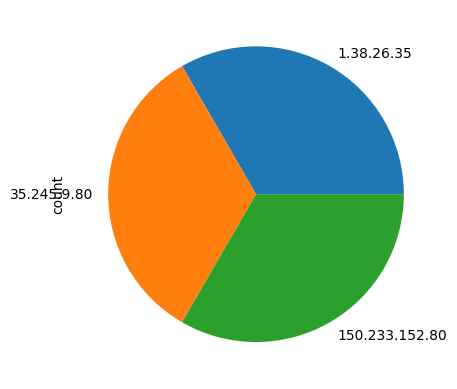

In [76]:
testresult_t_3plot.destination_ip.value_counts()[:15].plot.pie()

In [77]:
from sklearn.decomposition import IncrementalPCA
ipca_img_var = IncrementalPCA(n_components = 2, whiten = True, batch_size = 10)
ipca_img_var.fit(train_t_df_lof_var)

IncrementalPCA(batch_size=10, n_components=2, whiten=True)

In [78]:
reduced_test_data_lof_var = ipca_img_var.transform(test_df_lof_var)

In [79]:
lof_plot_df_var = testresult_t_3[['lof']]

In [84]:
lof_plot_df_var.loc[:, 'x'] = reduced_test_data_lof_var[:, 0]  # First column
lof_plot_df_var.loc[:, 'y'] = reduced_test_data_lof_var[:, 1]  # Second column

In [85]:
import seaborn as sns

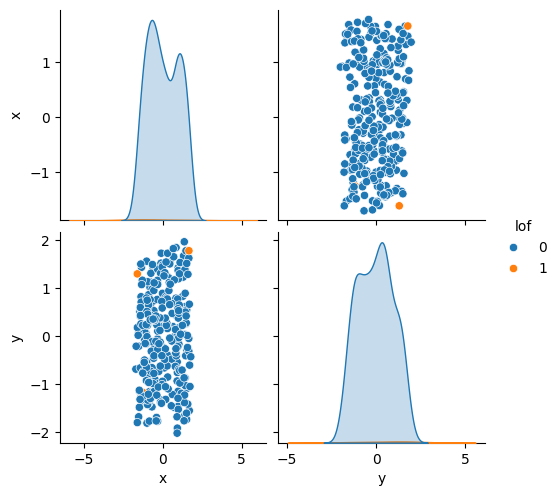

In [86]:
plot_lof_001_var = sns.pairplot(lof_plot_df_var, hue = 'lof')

In [87]:
plot_lof_001_var

In [88]:
plot_lof_001_var.savefig('plot_lof_001_var.png')

In [89]:
testresult_t_3plot.to_csv('test_result_lof_001_var.csv',index=False)